# Loan Application Status Prediction

## Project Description

This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

## Description of Independent Variables:

1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases

2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions

3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


## Requirement
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

In [1]:
# importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the dataset
df_loan=pd.read_csv("loan application.csv")
df_loan.sample(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
112,LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
65,LP001225,Male,Yes,0,Graduate,No,5726,4595.0,258.0,360.0,1.0,Semiurban,N
397,LP002281,Male,Yes,0,Graduate,No,3033,1459.0,95.0,360.0,1.0,Urban,Y
118,LP001421,Male,Yes,0,Graduate,No,5568,2142.0,175.0,360.0,1.0,Rural,N
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y
83,LP001273,Male,Yes,0,Graduate,No,6000,2250.0,265.0,360.0,NaN,Semiurban,N
602,LP002953,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
534,LP002731,Female,No,0,Not Graduate,Yes,18165,0.0,125.0,360.0,1.0,Urban,Y
493,LP002582,Female,No,0,Not Graduate,Yes,17263,0.0,225.0,360.0,1.0,Semiurban,Y
444,LP002424,Male,Yes,0,Graduate,No,7333,8333.0,175.0,300.0,NaN,Rural,Y


## Starting the EDA

In [3]:
# Checking Configuration of Dataset
df_loan.shape

(614, 13)

Obs- 
* We can see its a small dataset with 614 rows
* And there are 13 columns of which 12 are input, and the output is 'Loan-Status' classified as 'Y' or 'N' .

In [4]:
# Checking data types of attributes
df_loan.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Obs- We can see the dataset contains only 5 Numerical Columns, while others are all categorical.

In [5]:
# Checking for null values if any
df_loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Obs- We can see many columns have null entries,  treating the null values below

In [6]:
# Filling the missing values

##### For Categorical columns we will find mode of the entries and fill the missing values with it

In [7]:
df_loan['Gender'].fillna(df_loan['Gender'].mode()[0],inplace=True)
df_loan['Married'].fillna(df_loan['Married'].mode()[0],inplace=True)
df_loan['Dependents'].fillna(df_loan['Dependents'].mode()[0],inplace=True)
df_loan['Self_Employed'].fillna(df_loan['Self_Employed'].mode()[0],inplace=True) 

##### For Continuous columns we will find mean of the entries and fill the missing values with it

In [8]:
df_loan['LoanAmount'].fillna(df_loan['LoanAmount'].mean(),inplace=True)
df_loan['Loan_Amount_Term'].fillna(df_loan['Loan_Amount_Term'].mean(),inplace=True)

##### Credit hiostory even though is numerical, but has only 2 values, doing a mean/median will classify into non-existing class, so filling it with mode value

In [9]:
df_loan['Credit_History'].fillna(df_loan['Credit_History'].mode()[0],inplace=True) 

In [10]:
# Checking for null values again
df_loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# Checking for white spaces
df_loan.loc[0:]==" "

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


Obs- There is no white space in the data

In [12]:
#Check for duplicate data
df_loan.duplicated().sum()

0

Obs- We can see there is no duplicate data 

In [13]:
# Checking unique entries 
df_loan.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           204
Loan_Amount_Term      11
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

obs- We can see Loan-Id has all unique entries and is not equired for model prediction, wo will be deleting this column

In [14]:
# Deleting Loan_ID column
df_loan.drop(columns="Loan_ID", axis=1,inplace=True)

In [15]:
df_loan.shape

(614, 12)

Obs- We can see 1 column entry has been dropped

In [16]:
#Checking description of dataset
df_loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Obs-
* We can see mean of the columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount' is higher than median, and therefore we can say data is right skewed.

* We can see mean of columns 'Loan_Amount_Term', 'Credit_History' is lower than median , and therefore we can say data is left skewed

* Also we can observe max of the columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term' is exceptionally high than 75%, so we can say outliers are present in the columns

In [17]:
# Grouping categorical columns into one
cat_cols = [x for x in df_loan.columns if df_loan[x].dtypes=='O']
# Grouping numerical columns into one
num_cols = [y for y in df_loan.columns if df_loan[y].dtypes!='O']

In [18]:
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [19]:
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

## Visualization

### Univariate Analysis

In [20]:
df_loan.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Male      502
Female    112
Name: Gender, dtype: int64


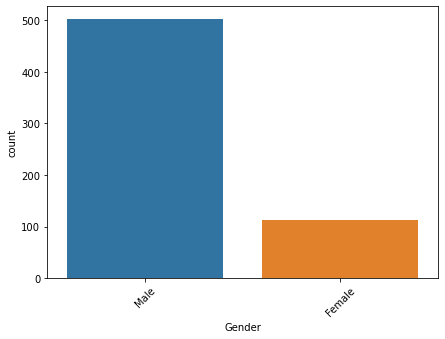

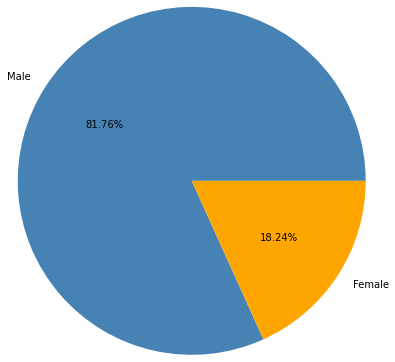

In [21]:
# Count plot to check individual value counts of 'Gender'
print(df_loan['Gender'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Gender'])
plt.xticks(rotation=45)
plt.show()
# Pie plot to show percentage diff 
fig, ax = plt.subplots()
ax.pie(df_loan['Gender'].value_counts(),labels = ['Male','Female'], radius=2,autopct='%1.2f%%',colors=['steelblue','orange'])
plt.show()

Obs- We can see the percentage of Male Applicants(81.36%) for Loan applictaion is far more than Female(18.64%)

Yes    401
No     213
Name: Married, dtype: int64


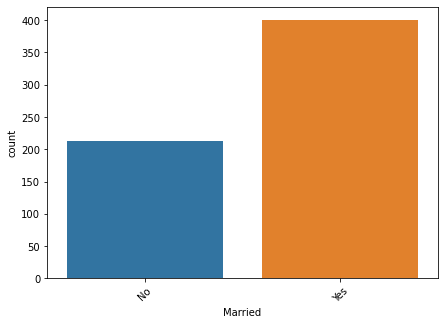

In [22]:
# Count plot to check  Marrital Status
print(df_loan['Married'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Married'])
plt.xticks(rotation=45)
plt.show()

Obs-We can see people who are married are double than those are not-married

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


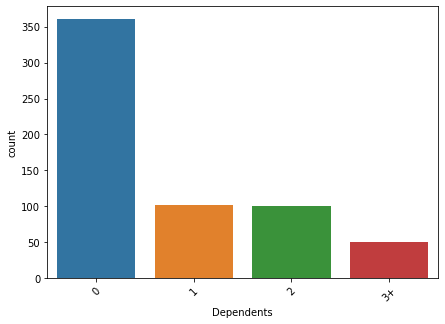

In [23]:
# Count plot to check individual value counts of 'Dependents'
print(df_loan['Dependents'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Dependents'])
plt.xticks(rotation=45)
plt.show()

Obs- We can observe that for people who have taken loan , max have '0' dependents, many have either 1/2 dependents, and a few others even have 3 or more than 3 dependents t

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


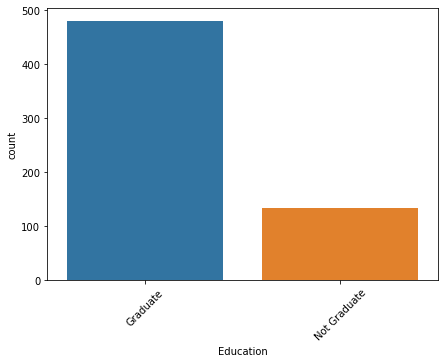

In [24]:
# Count plot to check individual value counts of 'Education'
print(df_loan['Education'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Education'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the max people those have appplied for Loan are Graduate

No     532
Yes     82
Name: Self_Employed, dtype: int64


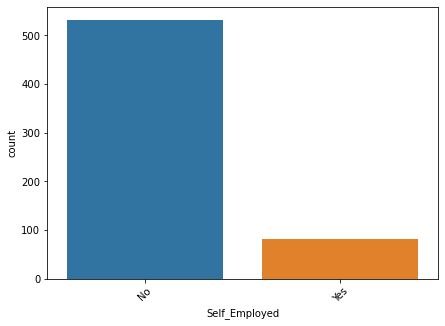

In [25]:
# Count plot to check whether people are self employed or not
print(df_loan['Self_Employed'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Self_Employed'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see a very few number of Employees are Self-Employed, and most of them we can say do job

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


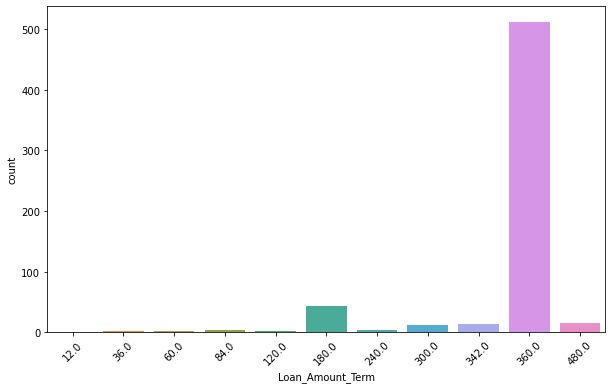

In [26]:
# Count plot to check individual value counts of 'Term-Amount'
print(df_loan['Loan_Amount_Term'].value_counts())

plt.figure(figsize=(10,6))
sns.countplot(df_loan['Loan_Amount_Term'])
plt.xticks(rotation=45)
plt.show()

Obs- We can observe most of the applicants have taken the Loan-Amount_Termfor 360 Months i.e. for 30 years, a few for 480 month(40 years), a very few who have taken for 36 months(3 years)/60months(5years)also

1.0    525
0.0     89
Name: Credit_History, dtype: int64


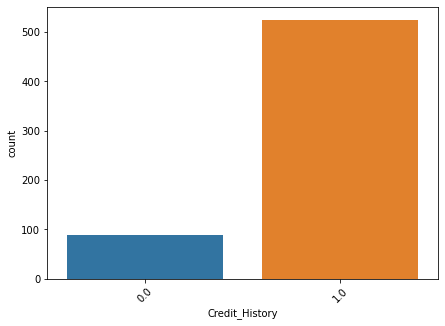

In [27]:
# Count plot to check status of 'Credit_History'
print(df_loan['Credit_History'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Credit_History'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see very few applicants those have applied for loan have bad Credit_history, while max have a good Credit_history

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


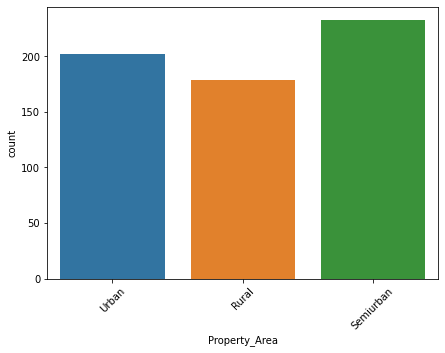

In [28]:
# Count plot to check property-area of applicants
print(df_loan['Property_Area'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Property_Area'])
plt.xticks(rotation=45)
plt.show()

Obs- There is an almost equal distribution of people from 'Urban','Rural','Semiurban' areas for loan

Y    422
N    192
Name: Loan_Status, dtype: int64


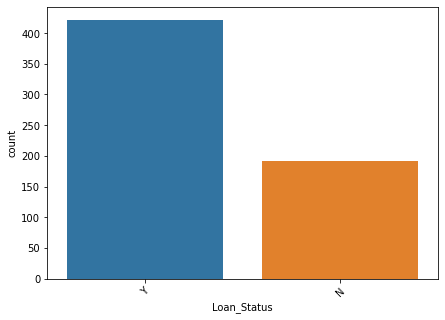

In [29]:
# Count plot to check individual value counts of Loan Status
print(df_loan['Loan_Status'].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df_loan['Loan_Status'])
plt.xticks(rotation=45)
plt.show()

Obs- We can see the loan has been approved for  422 person and been rejected for 192 person

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

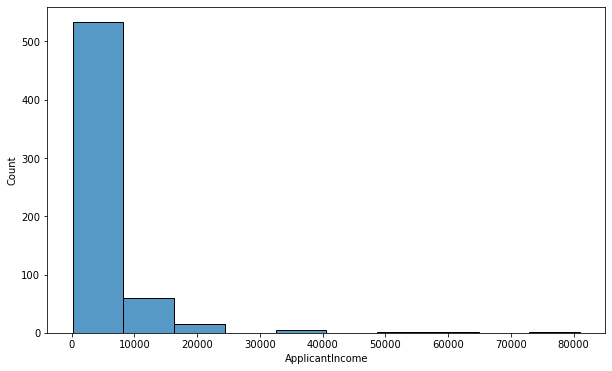

In [30]:
# Histogram to check distribution of Applicant's Income
plt.figure(figsize=(10,6))
sns.histplot(df_loan['ApplicantIncome'],bins=10)

Obs- We can see majority of applicant's income falls below or equal to 5000, few others have below or equal to 10000, a very few who have nearly 20000, and very few those have above that

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

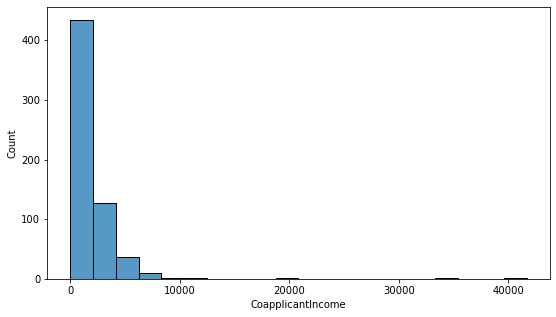

In [31]:
# Histogram to check distribution of Co-applicant's Income
plt.figure(figsize=(9,5))
sns.histplot(df_loan['CoapplicantIncome'],bins=20)

Obs- We can see majority of the co-applicant's income is below 4000

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

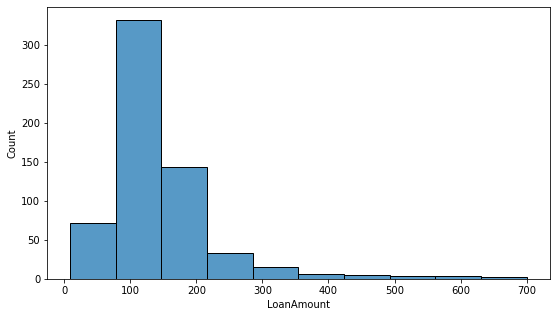

In [32]:
# Violin plot to check distribution of Loan Amount
plt.figure(figsize=(9,5))
sns.histplot(df_loan['LoanAmount'],bins=10)

Obs- We can see majority have filled for loan amount of nearly 100 thousands, a few who have filled for nearly 200 thousands, few who have filled for less than 100 thousands and a b=very few who have filled for more than 500 thousands

In [33]:
# Distribution plot to check skewness in the features

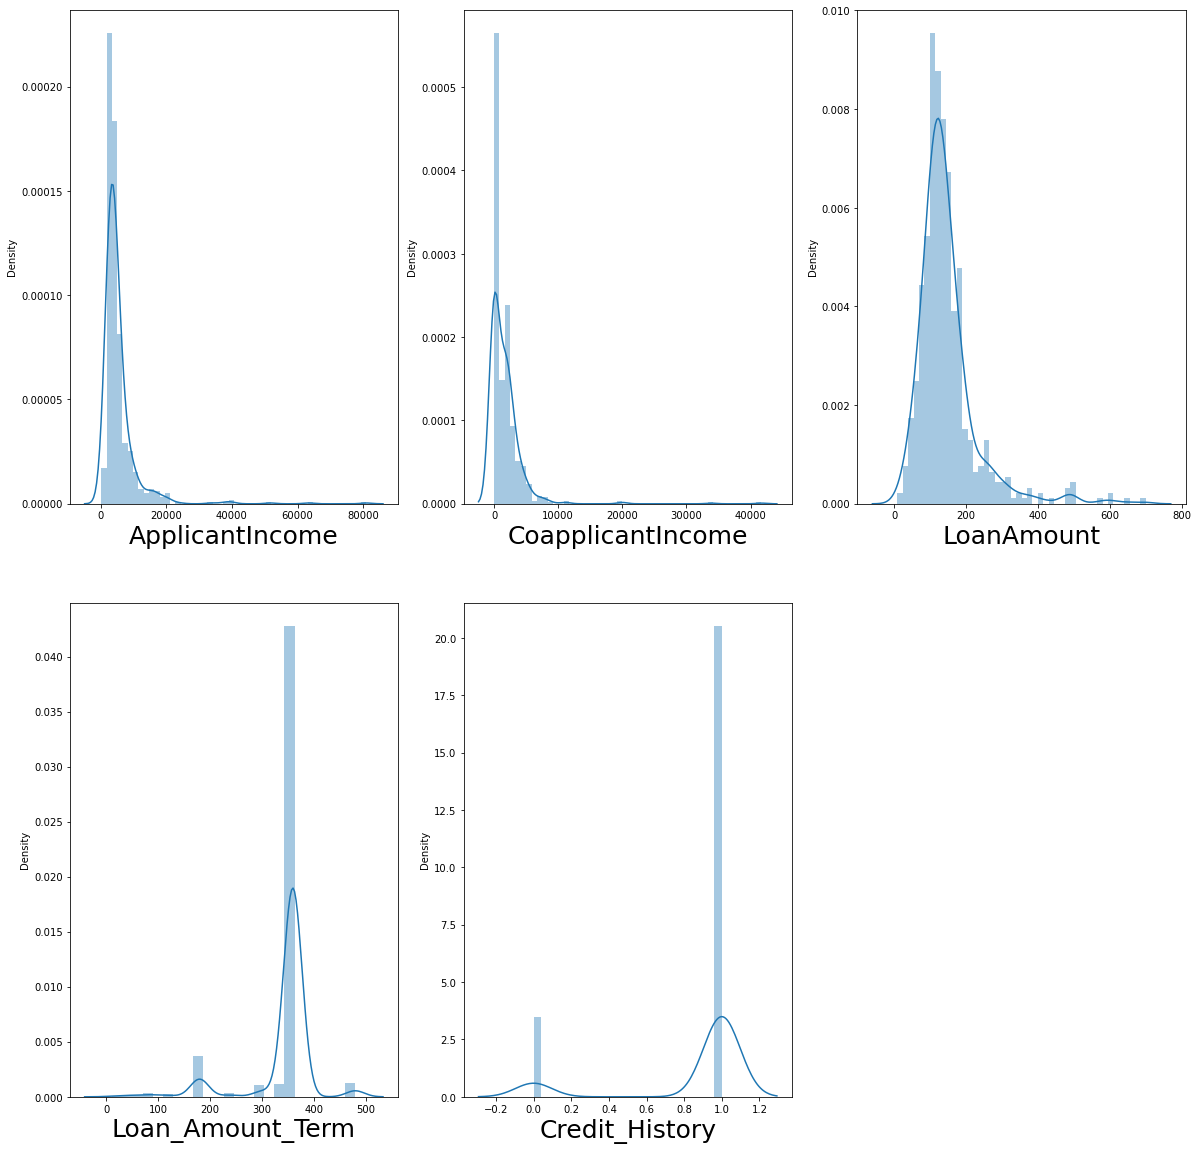

In [34]:
plt.figure(figsize=(20,20))
plotnumber=1

     
for column in num_cols:
    if plotnumber<=5: #as there are 5 continuous columns 
        ax=plt.subplot(2,3,plotnumber)
        sns.distplot(df_loan[column])
        plt.xlabel(column,fontsize=25)
    plotnumber +=1
plt.show()

Obs- We can see right skewness in the columns 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount0' and Left skewness in columns 'Loan_Amount_Term', 'Credit_History' 

In [35]:
#box plot to check outliers

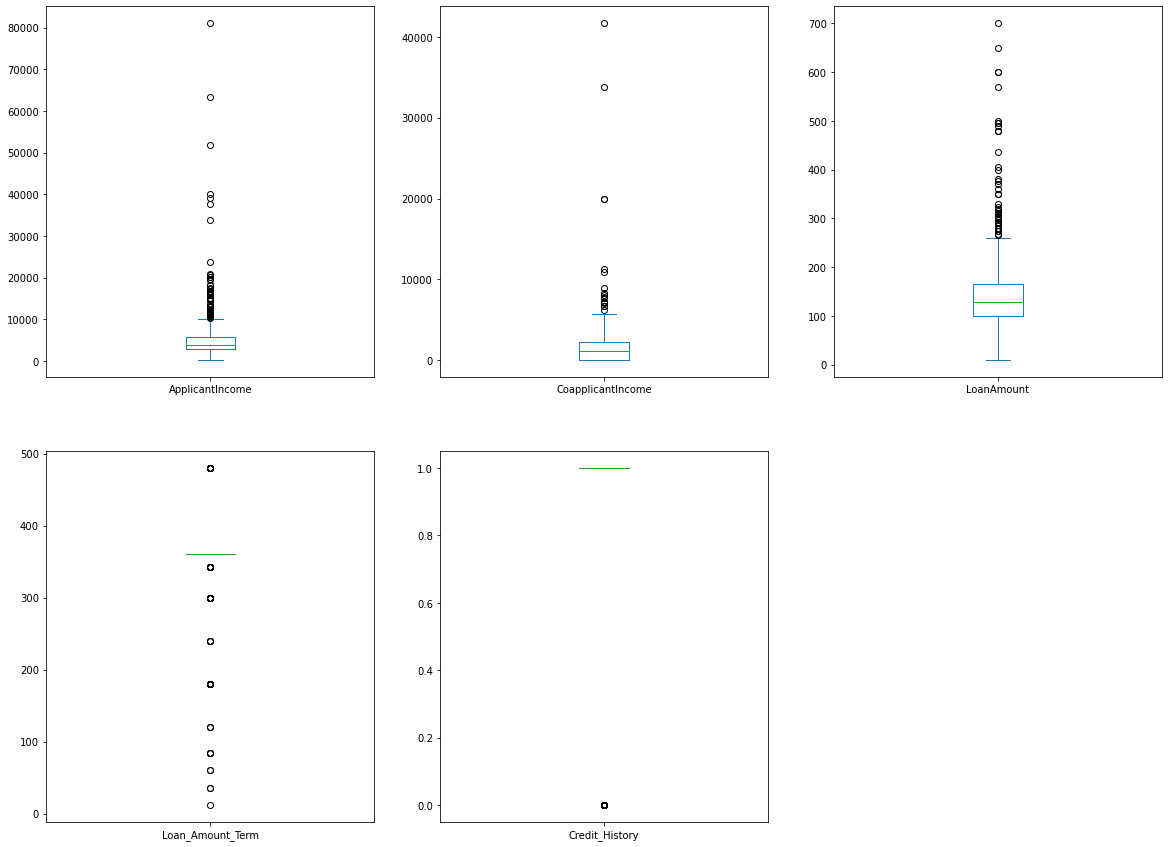

In [36]:
df_loan.plot(kind='box',subplots=True,layout=(2,3),figsize=(20,15))
plt.show()

Obs- We can see outliers are presemt in all the columns.

### Bivariate and Multivariate Visualization

In [37]:
# 'Loan_Status(Target)' vs Categorical Data Columns

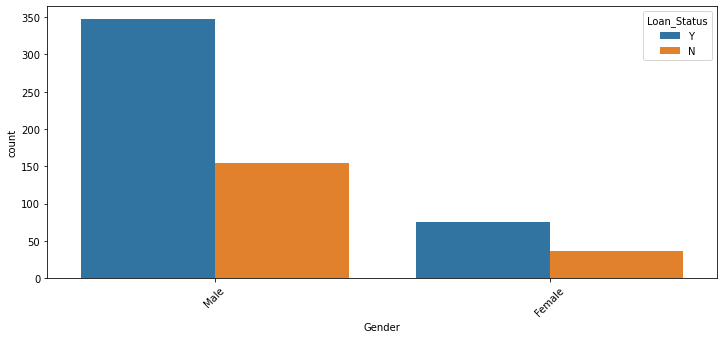

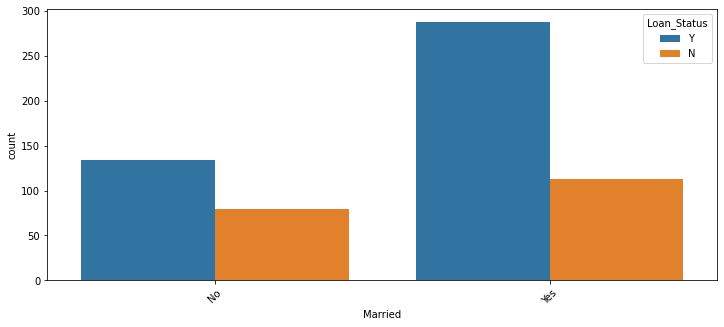

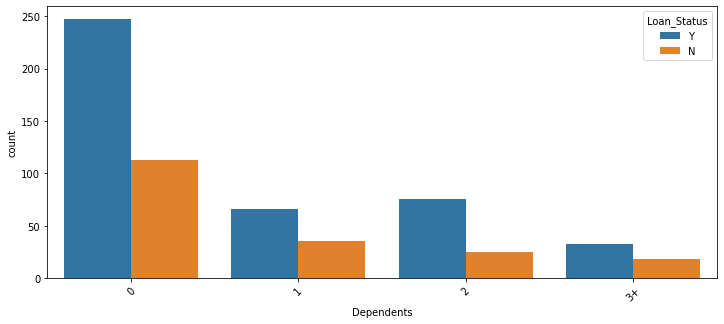

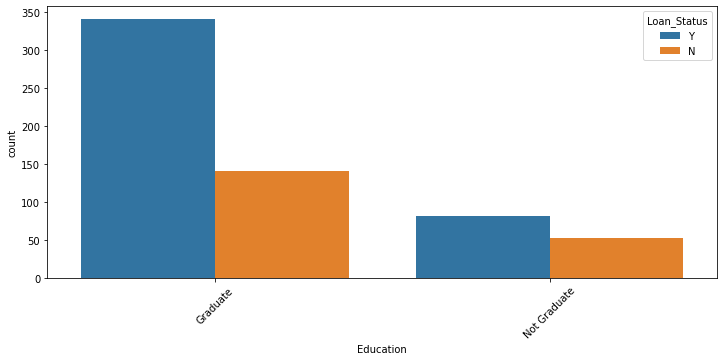

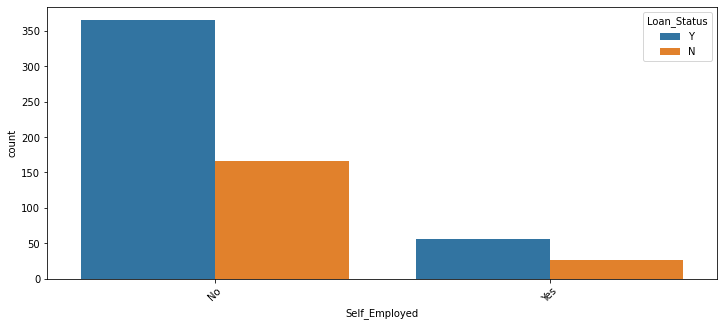

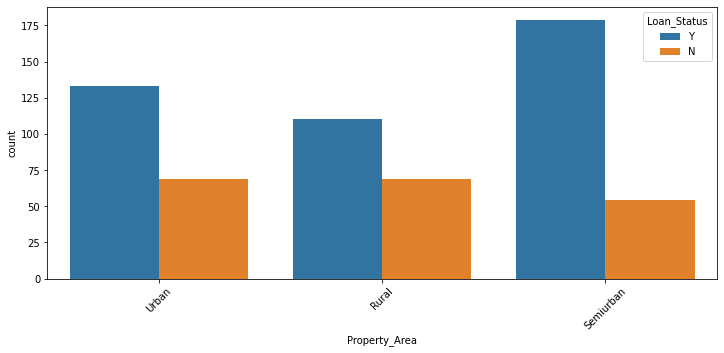

In [38]:
# count plot of the individual categorical features w.r.t. Loan_status

for i in df_loan[cat_cols[0:-1]]:  # Excluded Loan_status Column and added it as a hue
    plt.figure(figsize=(12,5))
    chart = sns.countplot(x=i,data=df_loan,hue='Loan_Status')
    plt.xticks(rotation=45)
    plt.show()

Obs- 
* 1.'Gender': We can see even though more numbber of males have applied for loans, but percentage of grant to females is more.
* 2.'Married': The loan approval percentage is more for unmarried person in comparison to married.
* 3.'Dependents': The no. of dependents haven't affected grant of loan.
* 4.'Self-Employeed': For people who are self-employees their percentage-of-approval is more.
* 5.'Property_Area': We can see 'Rural' area's percentage of loan-approval is the highest, followed by Urban and least no. of approvals are granted to Semiurban living people. 

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

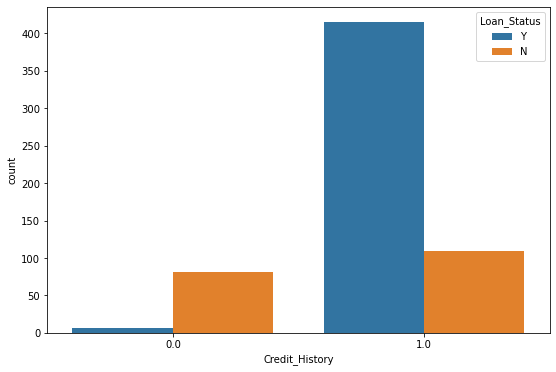

In [39]:
# Count Plot to check loan_status as per Credit_history
plt.figure(figsize=(9,6))
sns.countplot(x=df_loan['Credit_History'],hue=df_loan['Loan_Status'])

Obs- We can see even those who have bad credit_history are provided with loan_amount

In [40]:
# 'Loan_Status(Target)' vs Continuous Data Columns

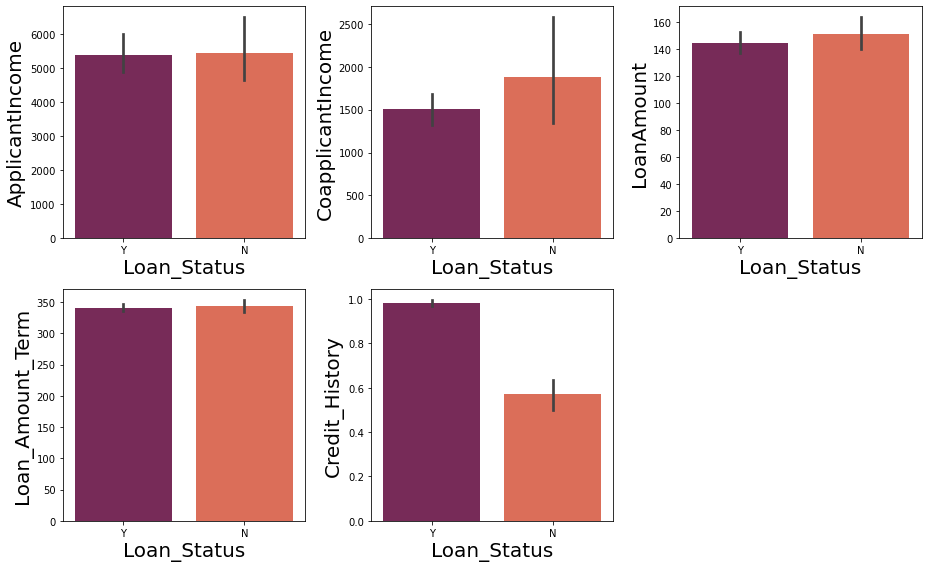

In [41]:
plt.figure(figsize=(13,8),facecolor='white')
plotnum=1
y = df_loan['Loan_Status']
X = df_loan[num_cols]
for col in X:
    if plotnum<=6:
        plt.subplot(2,3,plotnum)
        sns.barplot(y,X[col], palette='rocket')
        plt.xlabel('Loan_Status',fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotnum+=1
plt.tight_layout()

Obs- 
* 1. 'Applicant_Income': We can see Applicant's income doesn't mush affect the loan granting mechanism.
* 2. 'Coapplicant_Income': We can see Loan is granted more to people who have CoaaplicantIncomenearly 1500, and reject it if it is more than that.
* 3. 'Loan Amount'doesnt  much affect the loan_status
* 4. 'Loan_Amount_Term'doesnt  much affect the loan_status.
* 5.  For people who have good 'Credit_History', there no. of loan-approval is good, but we can even see, people whose 'Credit_History' is bad even their loan approval is very good

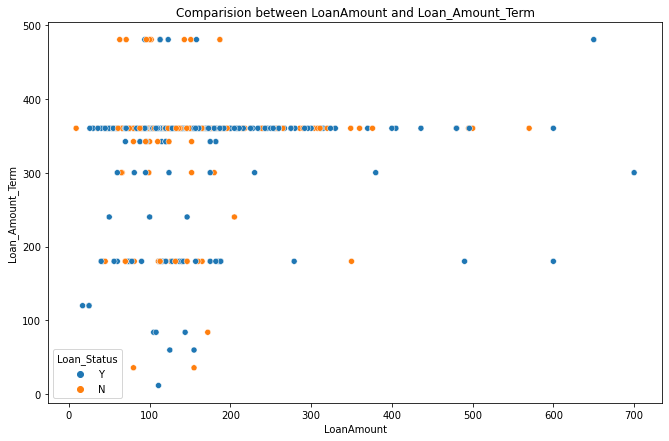

In [42]:
# Sactter Plot to check loan_status w.r.t LoanAmount and Loan_Amount_Term
plt.figure(figsize=[11,7])
plt.title('Comparision between LoanAmount and Loan_Amount_Term')
sns.scatterplot(df_loan['LoanAmount'],df_loan['Loan_Amount_Term'],hue=df_loan["Loan_Status"])
plt.show()

Obs- 
* We can see the easily, hose have opted for Loan Amount below 200 and for term of 120 months(10 years) are been approved easily
* For those who have opted for small Loan Amount but for long term period , there loans are not accepted
* Most of the case where Loan-Amount and Loan-Amount-Term are in proportion , the loans are accepted
* For those who have opted for big loan amount and for long term, there loans are accepted

Obs- There is a high density of points in the range of 0-2000 for ApplicantIncome, and 0-300 for loan amount which means if Applicants income is in the range of 0-2000 then the loan amount will be approved in the range 0-300.

## Label Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder

In [44]:
for col in df_loan[cat_cols]:
    le = LabelEncoder()
    df_loan[col] = le.fit_transform(df_loan[col])

In [45]:
df_loan.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.000000,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.000000,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.000000,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.000000,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.000000,360.0,1.0,1,0


In [46]:
df_loan.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

Obs- We can see all the categorical Columns have been encoded

## Checking Correlation

In [47]:
df_loan.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974
Credit_History,0.009170,0.010938,-0.040160,-0.073658,-0.001550,-0.018615,0.011134,-0.001431,0.000432,1.000000,0.001963,0.540556


<AxesSubplot:>

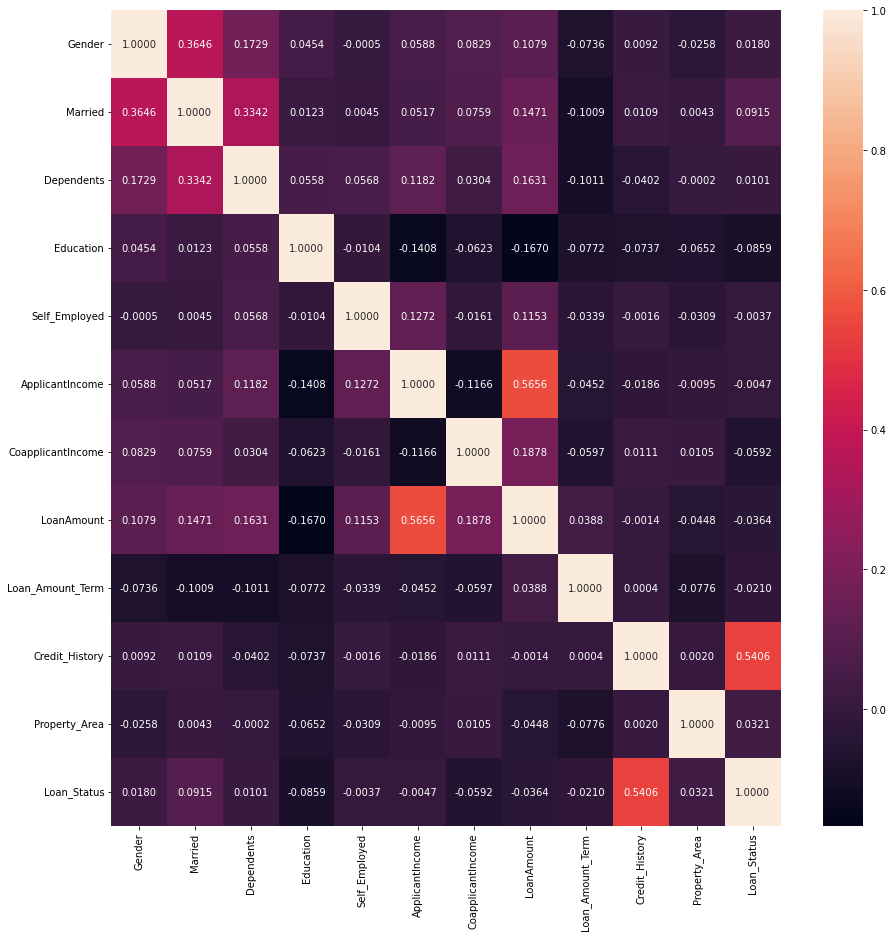

In [48]:
# Correlation using heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_loan.corr(),annot=True,fmt='0.4f')

Obs- We can observe
* Strongly Positively Correlated Columns(>0.7):None
* Positively Correlated Columns(>0.4): ('Applicant_Income' and 'Loan_Amount'),('Credit_History' and 'Loan_Status')
* Strongly Negatively Correlated Columns(>-0.7):None
* Negatively Correlated Columns(>-0.4):None 
* Almost Zero correlation with Target Column: 'Self-Employed', 'Applicant_Income'

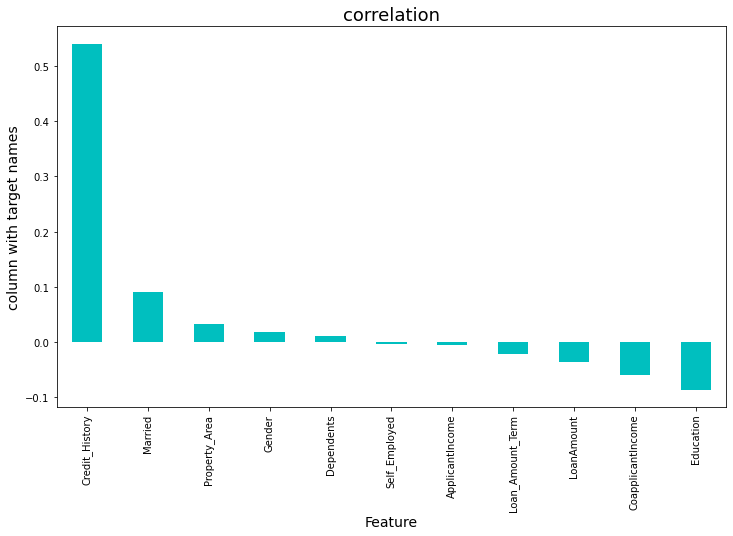

In [49]:
# Correlation of features with Target Column
plt.figure(figsize=(12,7))
df_loan.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()


Obs- 
* We can see Credit-History is the only column that has good correlation with target column. 
* The Columns 'Applicant_Income' and 'Self-Employed' have almost no relation with target Column, however 'Applicant_Income' has good relation with Loan_Amount , so keeping this column, but deleting the column 'Self_Employed'


In [50]:
# Deleting the column 'Self-Employed' 
df_loan.drop(columns='Self_Employed',axis=1,inplace=True)

In [51]:
df_loan.shape

(614, 11)

Obs-We can see 1 column has been deleted

## Detecting Outliers and Treating them

In [52]:
#Method 1: Z-Score
from scipy.stats import zscore
z=np.abs(zscore(df_loan))
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([5, 7, 7, 7, 4, 6, 7, 4, 6, 4, 6, 5, 6, 4, 4, 7, 7, 6, 6, 7, 4, 6,
       6, 5, 4, 5, 6, 4, 6, 7, 7, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6],
      dtype=int64))


In [53]:
df_loan_new=df_loan[(z<3).all(axis=1)]

In [54]:
print("df_loan.shape:",df_loan.shape, "\ndf_loan_new.shape:",df_loan_new.shape)

df_loan.shape: (614, 11) 
df_loan_new.shape: (577, 11)


In [55]:
# Checking data loss
data_loss=(614-577)/614*100
data_loss

6.026058631921824

In [56]:
# Method 2: IQR(Inter Quartile) Method
Q1=df_loan.quantile(0.25)
Q3=df_loan.quantile(0.75)
IQR=Q3 - Q1

df_loan_new2=df_loan[~((df_loan < (Q1 - 1.5 * IQR)) |(df_loan > (Q3 + 1.5 * IQR))).any(axis=1)]

In [57]:
print("df_loan.shape:",df_loan.shape, "\ndf_loan_new2.shape:",df_loan_new2.shape)

df_loan.shape: (614, 11) 
df_loan_new2.shape: (229, 11)


In [58]:
# Checking data loss
data_loss2=(614-229)/614*100
data_loss2

62.70358306188925

Obs- The Data Loss in IQR method is very high, so we will be going with Z-score method

In [59]:
# Reassigning obtained value to original dataframe
df_loan=df_loan_new
df_loan.shape

(577, 11)

## Model Building

## Seperating Input and Target variables

In [60]:
x=df_loan.drop(columns='Loan_Status')
y=df_loan['Loan_Status']

In [61]:
x.shape

(577, 10)

In [62]:
y.shape

(577,)

## Data Transformation to treat Skewness

In [63]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

obs- keeping the acceptable range +/- 0.5, we can see , except for 'Property_Area', skewness is present in all the columns

### Applying transformation method to treat the skewness

In [64]:
x=pd.DataFrame(x)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer() 
skew_col = ['Gender', 'Married', 'Dependents', 'Education', 'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
x[skew_col]= pt.fit_transform(x[skew_col].values)

In [65]:
# Rechecking the skewness
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.478360
Education            1.306588
ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.047692
Loan_Amount_Term     0.718470
Credit_History      -1.976043
Property_Area       -0.055332
dtype: float64

Obs- We can see, even after transformation, the skewness is still present in most of the columns, trying sqrt transform too to treat the skewness further

##### Note: Tried sqrt transformation, but it was creating null values in the data, so going further with the obtained values only

## Data Scaling

In [67]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x_scale=st.fit_transform(x)
x_scale=pd.DataFrame(x_scale)

In [69]:
x=pd.DataFrame(data=x_scale)

## Checking for Imbalance 

In [70]:
print(y.value_counts())

1    398
0    179
Name: Loan_Status, dtype: int64


Obs-We can see the target is imbalanced, and therefore we need to balance it.

### Oversampling using SMOTE

In [71]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x,y= SM.fit_resample(x,y)

In [72]:
print(y.value_counts())

1    398
0    398
Name: Loan_Status, dtype: int64


## Classification Model 
(As the target is to determine whether the loan_status will be yes or no, we are building a classification model)

In [77]:
# Finding best Random State

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state =i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    predlg = lg.predict(x_test)
    acc=accuracy_score(y_test, predlg)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.775  on Random_state  78


### Splitting data into Train-Test

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=78)

In [79]:
x_train.shape

(636, 10)

In [80]:
y_train.shape

(636,)

In [81]:
x_test.shape

(160, 10)

In [82]:
y_test.shape

(160,)

### Using various Machine Learning Algorithms

In [83]:
#importing necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1. Logistic Regression

In [84]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predlg))
print("Confusion Matrix:\n",confusion_matrix(y_test,predlg))
print("Classification Report:\n",classification_report(y_test,predlg))

Accuracy: 0.775
Confusion Matrix:
 [[43 31]
 [ 5 81]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.58      0.70        74
           1       0.72      0.94      0.82        86

    accuracy                           0.78       160
   macro avg       0.81      0.76      0.76       160
weighted avg       0.80      0.78      0.77       160



Obs- The Logistic Regression has provided the accuracy_score:0.0.775 and f1-score:0.70

### 2. GaussianNB

In [85]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgnb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgnb))
print("Classification Report:\n",classification_report(y_test,predgnb))

Accuracy: 0.75
Confusion Matrix:
 [[43 31]
 [ 9 77]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.58      0.68        74
           1       0.71      0.90      0.79        86

    accuracy                           0.75       160
   macro avg       0.77      0.74      0.74       160
weighted avg       0.77      0.75      0.74       160



Obs- The GaussianNB has provided the accuracy_score:0.75 and f1-score:0.68

### 3.Decision Tree Classifier

In [86]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,preddtc))
print("Confusion Matrix:\n",confusion_matrix(y_test,preddtc))
print("Classification Report:\n",classification_report(y_test,preddtc))

Accuracy: 0.8375
Confusion Matrix:
 [[65  9]
 [17 69]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        74
           1       0.88      0.80      0.84        86

    accuracy                           0.84       160
   macro avg       0.84      0.84      0.84       160
weighted avg       0.84      0.84      0.84       160



Obs- The Decision Tree Classifier has provided the accuracy-score:0.8375 and f1-score:0.83

### 4.K Nearest Neighbor Classifier

In [87]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn))
print("Classification Report:\n",classification_report(y_test,predknn))

Accuracy: 0.75
Confusion Matrix:
 [[59 15]
 [25 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75        74
           1       0.80      0.71      0.75        86

    accuracy                           0.75       160
   macro avg       0.75      0.75      0.75       160
weighted avg       0.76      0.75      0.75       160



Obs- The K Nearest Neighbor Classifier has provided the accuracy-score:0.75 and f1-score:0.75

### 5.Support Vector Machine Classifier

In [88]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predsvc))
print("Confusion Matrix:\n",confusion_matrix(y_test,predsvc))
print("Classification Report:\n",classification_report(y_test,predsvc))

Accuracy: 0.75
Confusion Matrix:
 [[48 26]
 [14 72]]
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.65      0.71        74
           1       0.73      0.84      0.78        86

    accuracy                           0.75       160
   macro avg       0.75      0.74      0.74       160
weighted avg       0.75      0.75      0.75       160



Obs- The Support Vector Machine Classifier has provided the accuracy-score:0.75 and f1-score:0.71

### 6. Ensemble Methods
#### 6.1 Random Forest Classifier

In [89]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predrf))
print("Confusion Matrix:\n",confusion_matrix(y_test,predrf))
print("Classification Report:\n",classification_report(y_test,predrf))

Accuracy: 0.89375
Confusion Matrix:
 [[65  9]
 [ 8 78]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88        74
           1       0.90      0.91      0.90        86

    accuracy                           0.89       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.89      0.89      0.89       160



Obs- The Random Forest Classifier has provided the accuracy-score:0.89375 and f1-score:0.88

#### 6.2 Ada Boost Classifier

In [90]:
ad=AdaBoostClassifier(n_estimators=50,learning_rate=1.0)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predad))
print("Confusion Matrix:\n",confusion_matrix(y_test,predad))
print("Classification Report:\n",classification_report(y_test,predad))

Accuracy: 0.78125
Confusion Matrix:
 [[59 15]
 [20 66]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.77        74
           1       0.81      0.77      0.79        86

    accuracy                           0.78       160
   macro avg       0.78      0.78      0.78       160
weighted avg       0.78      0.78      0.78       160



Obs- The Ada Boost Classifier has provided the accuracy-score:0.78125 and f1-score:0.85

#### 6.3 Gradient Boosting Classifier

In [92]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predgb))
print("Confusion Matrix:\n",confusion_matrix(y_test,predgb))
print("Classification Report:\n",classification_report(y_test,predgb))

Accuracy: 0.825
Confusion Matrix:
 [[59 15]
 [13 73]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81        74
           1       0.83      0.85      0.84        86

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.82      0.82      0.82       160



Obs- The Gradient Boosting Classifier has provided the accuracy-score:0.825 and f1-score:0.81

### Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score

In [96]:
# cv score for Logistic Regression 
cvlg=cross_val_score(lg,x,y,cv=5).mean()
print('CV score  for Logistic Regression:',cvlg)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predlg)-cvlg)

CV score  for Logistic Regression: 0.7097955974842767
And Difference between CV and accuracy_score= 0.06520440251572335


In [97]:
# cv score for GaussianNB 
cvgnb=cross_val_score(gnb,x,y,cv=5).mean()
print('CV score  for Gaussian NB:',cvgnb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgnb)-cvgnb)

CV score  for Gaussian NB: 0.7098270440251572
And Difference between CV and accuracy_score= 0.04017295597484283


In [98]:
# cv score for Decision Tree Classifier 
cvdtc=cross_val_score(dtc,x,y,cv=5).mean()
print('CV score  for Decision Tree Classifier:',cvdtc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,preddtc)-cvdtc)

CV score  for Decision Tree Classifier: 0.7864779874213836
And Difference between CV and accuracy_score= 0.05102201257861638


In [99]:
# cv score for K Neighbors Classifier 
cvknn=cross_val_score(knn,x,y,cv=5).mean()
print('CV score  for K Neighbors Clssifier:',cvknn)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predknn)-cvknn)

CV score  for K Neighbors Clssifier: 0.7675786163522014
And Difference between CV and accuracy_score= -0.01757861635220137


In [100]:
# cv score for Support Vector Machine Classifier 
cvsvc=cross_val_score(svc,x,y,cv=5).mean()
print('CV score  for Support Vector Classifier:',cvsvc)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predsvc)-cvsvc)

CV score  for Support Vector Classifier: 0.7299056603773584
And Difference between CV and accuracy_score= 0.02009433962264162


In [101]:
# cv score for Random Forest Classifier
cvrf=cross_val_score(rf,x,y,cv=5).mean()
print('CV score  for RandomForestClassifier:',cvrf)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predrf)-cvrf)

CV score  for RandomForestClassifier: 0.8555738993710692
And Difference between CV and accuracy_score= 0.03817610062893084


In [102]:
# cv score for Ada Boost Classifier
cvad=cross_val_score(ad,x,y,cv=5).mean()
print('CV score  for Ada Boost Classifier:',cvad)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predad)-cvad)

CV score  for Ada Boost Classifier: 0.724937106918239
And Difference between CV and accuracy_score= 0.05631289308176102


In [103]:
# cv score for GradientBoostingClassifier
cvgb=cross_val_score(gb,x,y,cv=3).mean()
print('CV score  for Gradienty Boosting Classifier:',cvgb)
print("And Difference between CV and accuracy_score=", accuracy_score(y_test,predgb)-cvgb)

CV score  for Gradienty Boosting Classifier: 0.7638861304203907
And Difference between CV and accuracy_score= 0.06111386957960929


Obs- 
* We can observe the difference between CV score and r2_score is least in the K Nearest Neighbor Classifier Model.
* Finding best parameters to pass in KNN below using hyper parameter tuning

## Hyper Parameter Tuning

In [104]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [105]:
#Selecting few parameter list to pass in Random Forest Classifier
from sklearn.model_selection import GridSearchCV
# defining parameter range:

parameter = {'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
            'n_neighbors':[3,4,5,6,7],
             'weights':['uniform', 'distance'],
             'p':[1,2]}

In [107]:
# Passing this parameters to GridSearchCV
GCV = GridSearchCV(knn,parameter,cv=5,scoring='accuracy')

GCV.fit(x_train,y_train)  
print(GCV.best_params_)         #printing the best parameter found by Gridsearchcv
GCV_pred = GCV.best_estimator_.predict(x_test)    #predicting accuracy with obtained best parameter 
accuracy_score(y_test, GCV_pred)                  #Printing accuracy

{'algorithm': 'auto', 'n_neighbors': 6, 'p': 1, 'weights': 'distance'}


0.76875

In [108]:
#Applying best parameter values on KNN Classifier Algorithm 
loan_best=KNeighborsClassifier(algorithm= 'auto', n_neighbors= 6, p= 1, weights= 'distance')
loan_best.fit(x_train,y_train)
predknn1=loan_best.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predknn1))
print("Confusion Matrix:\n",confusion_matrix(y_test,predknn1))
print("Classification Report:\n",classification_report(y_test,predknn1))

Accuracy: 0.76875
Confusion Matrix:
 [[60 14]
 [23 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.81      0.76        74
           1       0.82      0.73      0.77        86

    accuracy                           0.77       160
   macro avg       0.77      0.77      0.77       160
weighted avg       0.77      0.77      0.77       160



Our best model with best parameters has given  accuracy of  0.76875 and f1_score of 0.76

### Plotting ROC-AUC curve for best model

In [109]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

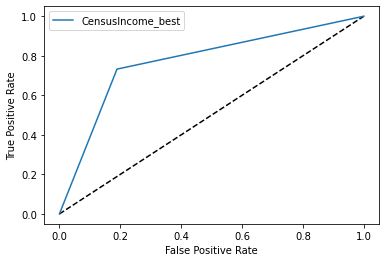

In [110]:
fpr,tpr,threshholds=roc_curve(y_test,predknn1)
auc = roc_auc_score(y_test,predknn1)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='CensusIncome_best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Obs- The best model ie. K Nearest Neighbor Classifier has AUC(area under curve)=  0.77%

## Saving the best model

In [112]:
import joblib

joblib.dump(loan_best,'loan.obj')

['loan.obj']

In [113]:
loan_model=joblib.load('loan.obj')

In [114]:
loan_model

KNeighborsClassifier(n_neighbors=6, p=1, weights='distance')

## Predicting the Output

In [115]:
ori = np.array(y_test)
predicted = np.array(loan_model.predict(x_test))
df_new = pd.DataFrame({"Original":ori,"Predicted":predicted},index= range(len(ori)))
df_new

,Original,Predicted
0,1,1
1,0,1
2,1,0
3,0,0
4,1,1
...,...,...
155,1,1
156,1,1
157,1,1
158,1,1


Obs- We can see our best model has given same results as original for majority of inputs

Text(0.5, 1.0, 'Original vs predicted  graph')

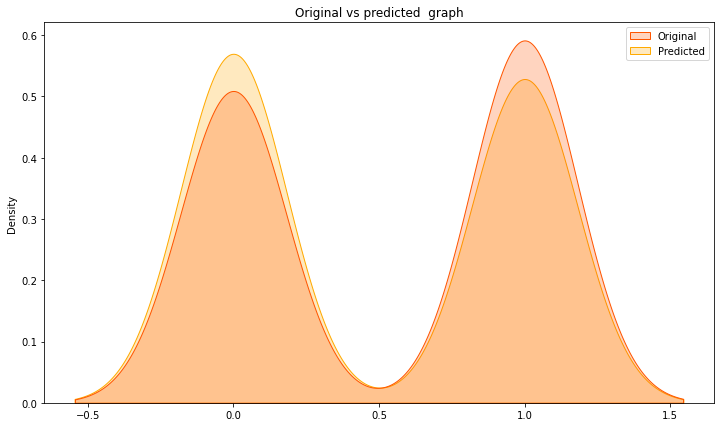

In [117]:
# Viewing the difference of prediction using Visualization 
plt.figure(figsize=(12,7))
sns.kdeplot(data=df_new, palette='autumn',gridsize=900, shade=True)
plt.title('Original vs predicted  graph')

Obs- We can observe from the graph,  predicted plot follows almost identical as the original one

## Concluding Remarks

* We have predicted the Loan_Status applied by various people having different Education, Occupation, Credit_History and Income.
* We classified the output using classification model. The prediction accuracies of these models were then checked.
* Also cross-validation was performed to avoid overfitting of models.
* The prediction results indicated that K nearest Neighbor Classifier model achieved a very good  prediction accuracy.